In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

path = "c:/Facultad/Tesis/"
Lkvec = pd.read_csv(path+'Lkvec_all_in.csv')

In [2]:
Lkvec_unique = Lkvec.drop_duplicates(subset=['phrase'])
Lkvec_unique

,time,frequency,media,phrase,root,id
0,2008-08-18 18:31:45,3,B,kind of creepy,it's kind of creepy to think that that many pe...,1785689
11,2008-09-25 22:03:51,1,M,it's kind of creepy,it's kind of creepy to think that that many pe...,1785689
78,2008-11-10 18:50:24,1,B,it's kind of creepy to think that that many pe...,it's kind of creepy to think that that many pe...,1785689
90,2008-09-24 04:43:54,1,M,we support all research that would further the...,we support all research that would further the...,1117502
161,2008-09-24 17:14:33,1,M,we support all research that would further the...,we support all research that would further the...,1117502
...,...,...,...,...,...,...
7665043,2008-12-15 21:51:32,1,M,the current cholera epidemic is only the most ...,the current cholera epidemic is only the most ...,2222921
7665076,2008-12-15 23:37:35,1,M,the current cholera epidemic is only the most ...,the current cholera epidemic is only the most ...,2222921
7665095,2008-09-05 17:08:04,1,B,and then click,option and then click on the,1686328
7665100,2008-11-02 21:35:41,2,B,and then click on the,option and then click on the,1686328


In [57]:
Lkvec_phrs_count = list(Lkvec_unique['id'].value_counts())
Lkvec_unique.value_counts('id')

id
2595895    177
1509852    132
1428671    101
1189        97
2323766     89
          ... 
1128644      3
1128691      3
1128694      3
1128758      3
2717518      3
Name: count, Length: 71568, dtype: int64

In [6]:
import pickle as pk
import os
import re

patern = r"_(\d+).pickle"
pathGit = 'c:/Git_Proyects/Tesis/Embbedings_Lkvec/'
variables = {}

for file in os.listdir(pathGit):
    if file.endswith('.pickle'):
        number = re.findall(patern, file)[0]
        variable_name = f"cluster_{number}"
        value = pk.load(open(pathGit+file, 'rb'))
        variables[variable_name] = value


        #clus_re.findall(patern, file)[0]
        print(file)
# clus_5 = pk.load(open(pathGit+'clusters_threshold_5.pickle', 'rb'))
# len(clus_5)

clusters_threshold_5.pickle
clusters_threshold_6.pickle
clusters_threshold_75.pickle
clusters_threshold_8.pickle


In [ ]:
archivos = list(variables.keys())
cantidad = {}
for file in archivos:
    cantidad = []
    for i,cluster in enumerate(file):
        print(len(file[i]))
#         cantidad.append(len(vari))
#    len(variables.get(clsuters[0]))


In [31]:
cantidades = {}
for file in archivos:
    data = variables.get(file)
    cantidad = []
    for i, cluster in enumerate(data):
        cantidad.append(len(data[i]))

    cantidades[file] = cantidad
    

In [ ]:
cantidades['cluster_8']

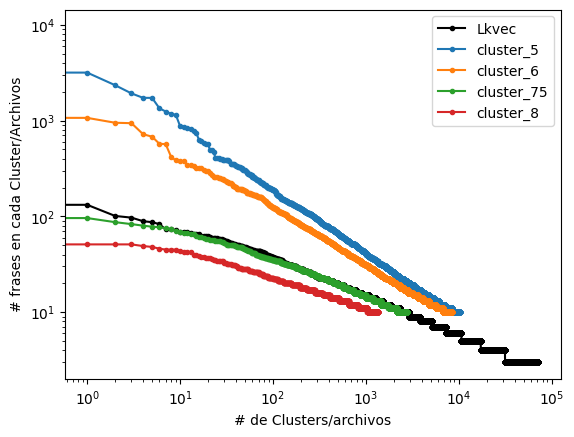

In [48]:
sorted(Lkvec_phrs_count, reverse = True)

plt.figure()
plt.plot(sorted(Lkvec_phrs_count, reverse = True), '.-',label ='Lkvec', color = 'black')
for file in archivos:
    cant_plot = sorted(cantidades[file], reverse = True)
    plt.plot(cant_plot, '.-', label = file)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('# frases en cada Cluster/Archivos')
plt.xlabel('# de Clusters/archivos')
plt.legend()
plt.show()

In [60]:
Lkvec_unique[Lkvec_unique['id'] ==2595895]['phrase']
#test = list(Lkvec_unique['id'].value_counts())

1095587                                       every so often
1095612                                       we have chosen
1095621                                         in the midst
1095638                                            a new age
1095673                                   my fellow citizens
                                 ...                        
1103692                                 to make hard choices
1103697    the greed and irresponsibility on the part of ...
1103710    sapping of confidence across our land a naggin...
1103721    a nagging fear that america's decline is inevi...
1103725    consequences of greed and irresponsibility on ...
Name: phrase, Length: 177, dtype: object

In [5]:
import pickle as pk
path1 = 'd:/Git_Proyects/Tesis/'
clusters = pk.load(open(path1+'Embbedings_Lkvec/clusters_threshold_75.pickle', 'rb'))
phr = pk.load(open(path+'phr_embbedings/phrases_to_emb.pickle', 'rb'))
len(clusters)

2808